The goal of this notebook is to take our dataset and create a zip containing the images and a csv file containing the labels in relation to the images. The labels are 4 numbers for bounding boxes.

The zip is then to be sent to google drive from where we will be able to use it inside our google colab notebook.

In [8]:
from os import path, walk
from matplotlib import pyplot as plt
from matplotlib import patches
import random as rd
from tqdm import tqdm
import cv2 as cv
import numpy as np
import pandas as pd

from alprLib.PlateBoundingBox import PlateBoundingBox

In [9]:
DATASET_PATH = "./archive"
ANNOTATIONS_PATH = path.join(DATASET_PATH, "annotations")
IMAGES_PATH = path.join(DATASET_PATH, "images")

Image shape: (300, 400, 4)


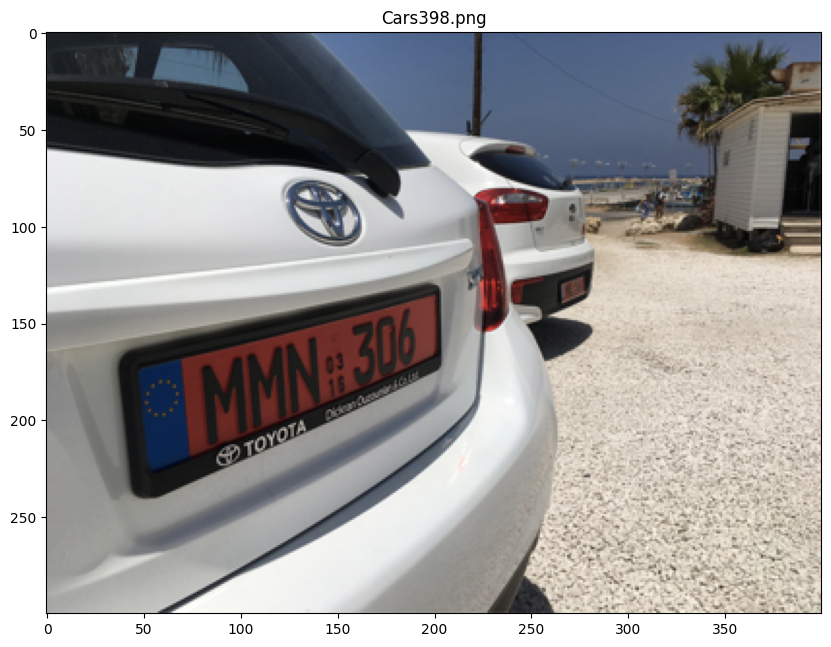

In [10]:
image_filenames = list(walk(IMAGES_PATH))
image_filename = rd.choice(image_filenames[0][2])
image_path = path.join(image_filenames[0][0], image_filename)
img = plt.imread(image_path)
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title(image_filename)
ax.imshow(img)
print('Image shape: {}'.format(img.shape))

In [11]:
annotation = image_filename.split('.')[0] + '.xml'
annotation_path = path.join(ANNOTATIONS_PATH, annotation)
print('Annotation path: {}'.format(annotation_path))

with open(annotation_path, 'r') as f:
    print(f.read())

Annotation path: ./archive/annotations/Cars398.xml

<annotation>
    <folder>images</folder>
    <filename>Cars398.png</filename>
    <size>
        <width>400</width>
        <height>300</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>licence</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>72</xmin>
            <ymin>139</ymin>
            <xmax>196</xmax>
            <ymax>222</ymax>
        </bndbox>
    </object>
</annotation>


In [12]:
plate = PlateBoundingBox(annotation_path)
plate.describe()

PlateBoundingBox
xml_path: ./archive/annotations/Cars398.xml
image_name: Cars398.png
xmin: 72
ymin: 139
xmax: 196
ymax: 222
width: 124
height: 83
center: (134.0, 180.5)
area: 10292



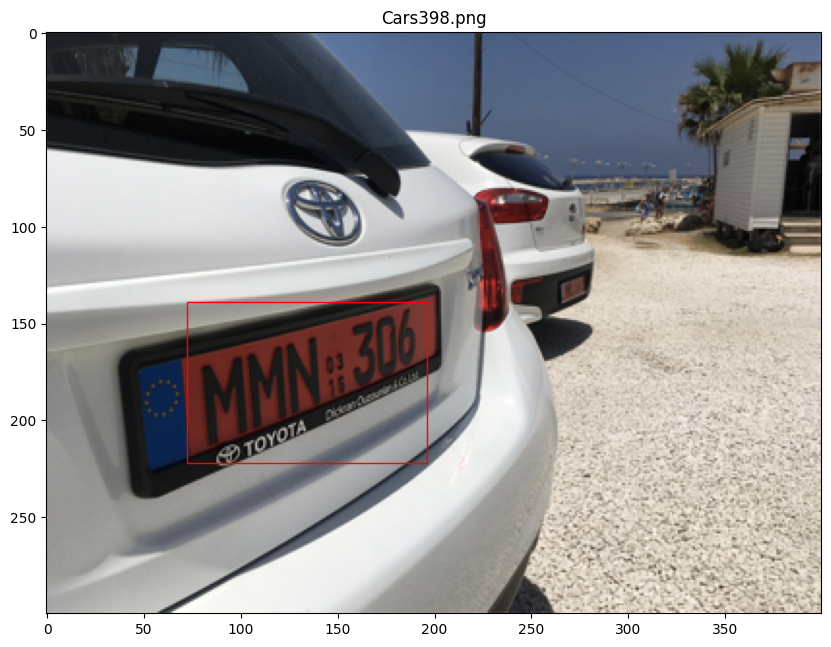

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title(image_filename)
ax.imshow(img)
rect = patches.Rectangle((plate.xmin, plate.ymin), plate.width, plate.height, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

In [25]:
# create a dataframe that holds the bounding box information for each image
df = pd.DataFrame(columns=['filename', 'xmin', 'ymin', 'xmax', 'ymax'])
for filename in tqdm(image_filenames[0][2]):
    annotation = filename.split('.')[0] + '.xml'
    annotation_path = path.join(ANNOTATIONS_PATH, annotation)
    plate = PlateBoundingBox(annotation_path)
    new_row = pd.DataFrame({'filename': filename, 'xmin': plate.xmin, 'ymin': plate.ymin, 'xmax': plate.xmax, 'ymax': plate.ymax}, index=[0])
    df = pd.concat([df, new_row], ignore_index=True)

df.head()

100%|██████████| 433/433 [00:00<00:00, 2042.06it/s]


,filename,xmin,ymin,xmax,ymax
0,Cars84.png,167,201,238,220
1,Cars405.png,241,207,299,232
2,Cars356.png,241,216,364,275
3,Cars167.png,176,254,327,285
4,Cars103.png,230,129,248,134


In [30]:
# zip ./archive/images with the dataframe exported as csv

# export the dataframe as csv
df.to_csv('labels.csv', index=False)

# zip the images and the csv file (make sure all files are copied to the root of the zip file)
!zip -j dataset.zip ./archive/images/* labels.csv

  adding: Cars0.png (deflated 0%)
  adding: Cars100.png (deflated 0%)
  adding: Cars101.png (deflated 0%)
  adding: Cars102.png (deflated 0%)
  adding: Cars103.png (deflated 0%)
  adding: Cars104.png (deflated 0%)
  adding: Cars105.png (deflated 0%)
  adding: Cars106.png (deflated 0%)
  adding: Cars107.png (deflated 0%)
  adding: Cars108.png (deflated 0%)
  adding: Cars109.png (deflated 0%)
  adding: Cars10.png (deflated 0%)
  adding: Cars110.png (deflated 0%)
  adding: Cars111.png (deflated 0%)
  adding: Cars112.png (deflated 0%)
  adding: Cars113.png (deflated 0%)
  adding: Cars114.png (deflated 0%)
  adding: Cars115.png (deflated 0%)
  adding: Cars116.png (deflated 0%)
  adding: Cars117.png (deflated 0%)
  adding: Cars118.png (deflated 0%)
  adding: Cars119.png (deflated 0%)
  adding: Cars11.png (deflated 0%)
  adding: Cars120.png (deflated 0%)
  adding: Cars121.png (deflated 0%)
  adding: Cars122.png (deflated 0%)
  adding: Cars123.png (deflated 0%)
  adding: Cars124.png (deflated 